In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
# data = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_single.txt", delimiter=',')#data/cluster_data/l2d_triangular/phtra/L1=128_L2=64
# data2 = np.loadtxt("data/cluster_data/l2d_hexagonal/phtra/N=16384/cat_hexagon.txt", delimiter=',')

# data = data[data[:, -2].argsort()]
# data2 = data2[data2[:, -2].argsort()]
# plt.plot(data[:, -2], gaussian_filter(data[:, 1],sigma=0), '-')
# plt.plot(data2[:, -2], gaussian_filter(data2[:, 1],sigma=0), '-')

# # plt.axvline(0.065)

In [32]:
side = 128
p = 0.092
cell = 'single'
number_of_averages = 1000
fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
try:
    with open(fpath, 'rb') as file:
        data = pickle.load(file)
except:
    print('no data found')

In [33]:
sizes, counts = map(np.array, zip(*sorted(data.items())))
data = np.repeat(sizes, counts)

Calculating best minimal value for power law fit


1.9113936295850507

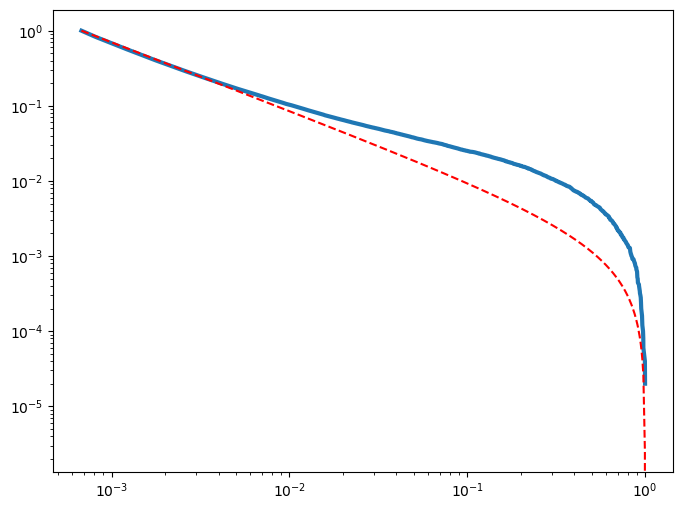

In [34]:
sorted_indices = np.argsort(data)[::-1]
sorted_data = data[sorted_indices]
# Generate ranks for each size
ranks = np.arange(1, len(data) + 1)

# Make the rank-size plot
plt.figure(figsize=(8, 6))
# plt.loglog(ranks, sorted_data, marker='o', linestyle='-', color='b')
fit = powerlaw.Fit(data/np.max(data), xmax=1)
figCCDF = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
fit.alpha

In [3]:


# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# List to hold all found p values
p_values = []

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob('data/cluster_data/l2d_squared/lrgsg/*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract and store the p value
        p_values.append(float(match.group(1)))

# Remove duplicates and sort the values
p_values = sorted(set(p_values))

print(p_values)

[0.000691, 0.00195, 0.00552, 0.00857, 0.009, 0.0102, 0.0136, 0.0156, 0.0169, 0.0173, 0.0185, 0.0217, 0.0233, 0.0252, 0.0256, 0.0267, 0.0298, 0.031, 0.0335, 0.0339, 0.035, 0.0379, 0.0387, 0.0419, 0.0422, 0.0432, 0.046, 0.0464, 0.0502, 0.0505, 0.0515, 0.054, 0.0541, 0.0588, 0.0597, 0.0617, 0.0622, 0.0668, 0.0671, 0.068, 0.0694, 0.0703, 0.0752, 0.0754, 0.0762, 0.0771, 0.0785, 0.0837, 0.0845, 0.0848, 0.0866, 0.0918, 0.092, 0.0924, 0.0927, 0.0947, 0.1, 0.101, 0.103, 0.108, 0.109, 0.111, 0.115, 0.117, 0.119, 0.123, 0.125, 0.126, 0.127, 0.131, 0.134, 0.135, 0.139, 0.142, 0.143, 0.146, 0.15, 0.151, 0.154, 0.158, 0.159, 0.162, 0.167, 0.168, 0.169, 0.175, 0.176, 0.177, 0.183, 0.184, 0.185, 0.192, 0.2, 0.233, 0.267, 0.3, 0.333, 0.367, 0.4, 0.433, 0.467, 0.5, 0.625, 0.75, 0.875, 1.0]


Calculating best minimal value for power law fit
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal 

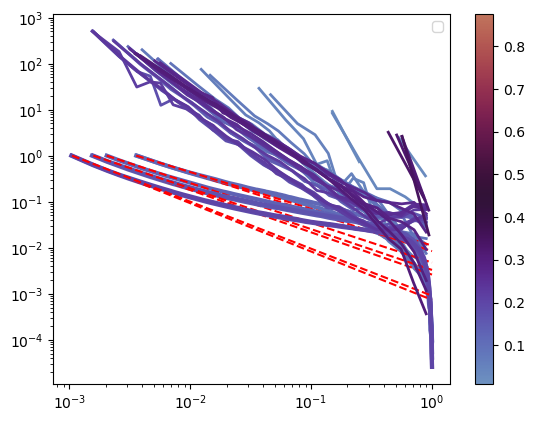

In [9]:
side = 64
cmap = plt.cm.twilight
colors = cmap(np.linspace(0.2, 0.8, len(p_values)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)
pval_real = []
for p in p_values:
    cell = 'single'
    number_of_averages = 1000
    fpath = f"data/cluster_data_perc/l2d_squared/lrgsg/N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
        # plt.plot(sizes, counts)
    arr = []
    data = np.repeat(sizes, counts)
    try:
        fit = powerlaw.Fit(data/np.max(data))
        fit.plot_pdf(linewidth=2)
        # x, y, w = log_binning(data, binnum=10)
        if 0.09 < p < 0.15:
            # plt.plot(x, y/w, marker='.')
            fit = powerlaw.Fit(data/np.max(data))
            figCCDF = fit.plot_ccdf(linewidth=3)
            fit.power_law.plot_ccdf(ax=figCCDF, color='r', linestyle='--',)
            # fit.plot_pdf(color='b', linewidth=2)
            # fit.power_law.plot_pdf(color='r', linestyle='--')
        # Print the xmin value of the fit
        arr.append([p, fit.alpha])
    except ValueError:
        continue
    pval_real.append(p)
    # else:
    #     plt.plot(sizes, counts, c='red', zorder=10)
x = np.logspace(0, 3)
cmap = plt.cm.twilight
cmap_val = cmap(np.linspace(0.2, 0.8, len(pval_real)))
custom_cmap = LinearSegmentedColormap.from_list("custom_twilight", cmap_val)
# cmap_tra = create_custom_colormap(c1="#02a618", c2="#00eeff")
cmap_nrm = Normalize(vmin=min(pval_real), vmax=max(pval_real))
plt.colorbar(ScalarMappable(norm=cmap_nrm, cmap=custom_cmap),  ax=plt.gca(), orientation='vertical')
# plt.plot(x,5*10**5*x.astype(float)**(-2.), 'k--', zorder=11)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
for i,j in arr:
    print("p: ", i, " - alpha: ", j)
plt.xscale('log')
plt.yscale('log')
plt.legend()
# plt.ylim(bottom=0.01)

In [3]:
number_of_averages = 1000
merged_dict = Counter()
for L in [8, 16, 32, 64, 128]:
    for p in [0.01, 0.034, 0.08, 0.103, 0.12, 0.206, 0.412]:
        lattice = Lattice2D(L, pflip=p, dataOutdir="data/cluster_data_perc/",  init_weight_dict=False)
        filename = f'{lattice.lrgsgpath}p={p:.3g}_na={number_of_averages}_.pkl'
        print(filename)
        if os.path.exists(filename):
            print('reading')
            with open(filename, 'rb') as file:
                data = pickle.load(file)

data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.034_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.08_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.103_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.12_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.206_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=64/p=0.412_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.034_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.08_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.103_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.12_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.206_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=256/p=0.412_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=1024/p=0.01_na=1000_.pkl
data/cluster_data2/l2d_squared/lrgsg/N=1024/p=0.034_n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


377789 1048576
229763 524176
103051 262144
34081 65536
12642 16384
3621 4096
970 1024


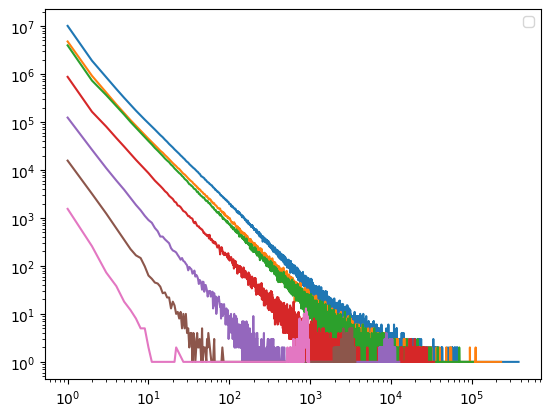

In [64]:
p = 0.103
#
for side, bins in zip(reversed([32, 64, 128, 256, 512, 724, 1024]), reversed([5, 10, 10, 6, 8, 10, 10, 10])):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={number_of_averages}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    print(np.max(sizes), side**2)
    sizes = np.array(sizes)
    counts = np.array(counts)
    # Replicate sizes based on normalized probabilities for log binning
    # Using np.repeat and multiplying probabilities by a large number to simulate replication
    replicated_sizes = np.repeat(np.array(sizes), counts) 
    # Perform log binning on the replicated distribution
    # bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=bins)

    # total_area = np.sum(hist * bin_w)

    # Normalize the histogram to make it a probability distribution
    # normalized_hist = hist / total_area
    # print(replicated_sizes)
    # Plot the normalized probability distribution

    # line, = plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2, label=f'N={side**2}')
    plt.plot(sizes, counts)
    # plt.axvline(side**2, c=line.get_color())

#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
# x = np.logspace(0, 4.5)
# plt.plot(x, 3e7*x**(-.8), 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend()

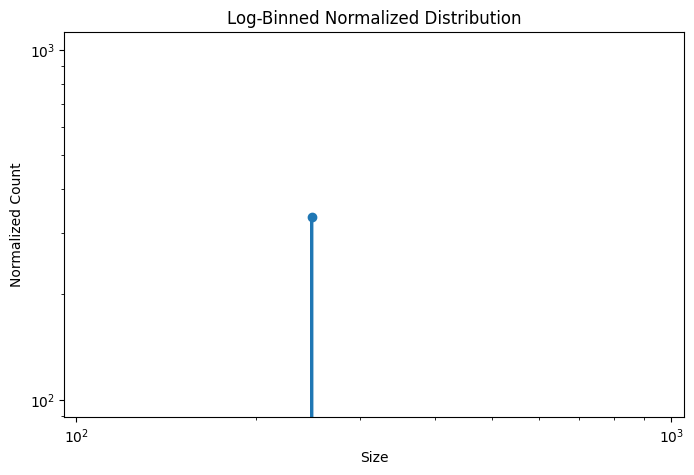

In [45]:


# Normalize counts to probabilities
total_counts = np.sum(counts)
probabilities = counts / total_counts

# Replicate sizes based on normalized probabilities for log binning
# Using np.repeat and multiplying probabilities by a large number to simulate replication
replicated_sizes = np.repeat(np.array(sizes), (probabilities * 10000).astype('int64')) 

# Perform log binning on the replicated distribution
bin_centers, hist, bin_w = log_binning(replicated_sizes, binnum=20)

# Plot the log-binned data using plt.plot
plt.plot(bin_centers, hist / bin_w, marker='o', linestyle='-', linewidth=2)  # Normalizing y-values by bin width
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size')
plt.ylabel('Normalized Count')
plt.title('Log-Binned Normalized Distribution')
plt.show()


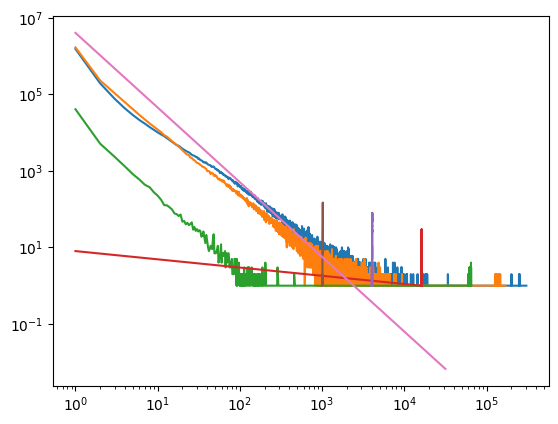

In [30]:
p = 0.034
#
for side in reversed([32, 64, 128, 256, 512, 724]):
    fpath = f"data/cluster_data/l2d_squared/lrgsg/N={side**2}/p={p:.3g}_na={1000}_.pkl"
    try:
        with open(fpath, 'rb') as file:
            data = pickle.load(file)
    except:
        continue
    sizes, counts = zip(*sorted(data.items()))
    plt.plot(sizes, counts)
#     binc, hist, bw = log_binning(prova, 8)
#     hist1 = hist/bw
#     np.where(hist1==0., np.inf, hist1)
#     plt.plot(binc, np.where(hist1==0., np.inf, hist1), 'h-', label=f"{side}")
# plt.plot(binc, 5*(1.0*np.array(binc))**(-1.1))
#
x = np.logspace(0, 4.5)
plt.plot(x, 4e6*x**(-1.95))
plt.xscale('log')
plt.yscale('log')